In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from pprint import pprint
import time
from scipy.stats import linregress
import reverse_geocoder as rg
import glob

In [2]:
# Load in csv 
all_earthquakes = pd.read_csv("earthquake_data_1980-2020.csv")

all_earthquakes.head()

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year
0,12.353,95.192,20.0,5.1,400,"Andaman Islands, India region",1980-01-01 01:24:37.200,1,1,1980
1,27.261,60.259,33.0,5.3,432,southeastern Iran,1980-01-01 02:45:54.000,1,1,1980
2,-31.211,58.717,10.0,5.0,385,Southwest Indian Ridge,1980-01-01 16:41:45.700,1,1,1980
3,38.815,-27.780,10.0,6.7,691,"Azores Islands, Portugal",1980-01-01 16:42:40.000,1,1,1980
4,3.491,126.716,54.0,5.0,385,"Kepulauan Talaud, Indonesia",1980-01-01 19:19:05.900,1,1,1980


In [3]:
# create bins base on magnitude
bins = [5, 5.99, 6.99, 7.99, 8.99, 9.99, 10.99]

# Create the names for the bins
group_names = ["Moderate", "Strong", "Very Strong", "Severe", "Violent", "Extreme"]

all_earthquakes['Scale'] = pd.cut(all_earthquakes['Mag'], bins, labels=group_names, include_lowest=True)


In [4]:
gp_earthquakes = all_earthquakes.groupby(['Scale']).count()
gp_earthquakes

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year
Scale,,,,,,,,,,
Moderate,61557,61557,61557,61557,61557,61556,61557,61557,61557,61557
Strong,5453,5453,5453,5453,5453,5453,5453,5453,5453,5453
Very Strong,543,543,543,543,543,543,543,543,543,543
Severe,32,32,32,32,32,32,32,32,32,32
Violent,2,2,2,2,2,2,2,2,2,2
Extreme,0,0,0,0,0,0,0,0,0,0


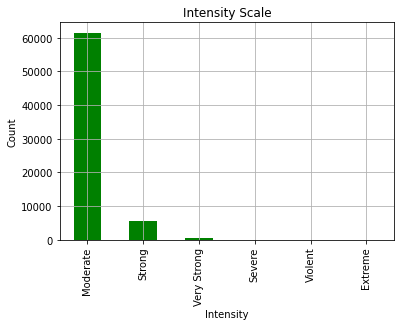

In [5]:
# Plot the data
gp_earthquakes["Mag"].plot(kind ="bar", color="g")


# Format title and axis labels
plt.title("Intensity Scale")
plt.xlabel("Intensity")
plt.ylabel("Count")
plt.grid(True)

# Save the graph
plt.savefig("images/Intensity_Count.png")

#Display Graph
plt.show()

In [6]:
# subset earthquakes with magnitude 7 and above
vstrong_earthquakes = all_earthquakes.loc[all_earthquakes['Mag']>=7,:]
vstrong_earthquakes.sort_values('Mag', ascending=False)

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Scale
50653,38.2970,142.3730,29.0,9.1,2184,"2011 Great Tohoku Earthquake, Japan",2011-03-11 05:46:24.120,3,11,2011,Violent
37532,3.2950,95.9820,30.0,9.1,2080,2004 Sumatra - Andaman Islands Earthquake,2004-12-26 00:58:53.450,12,26,2004,Violent
48162,-36.1220,-72.8980,22.9,8.8,1991,"offshore Bio-Bio, Chile",2010-02-27 06:34:11.530,2,27,2010,Severe
38397,2.0850,97.1080,30.0,8.6,2048,"northern Sumatra, Indonesia",2005-03-28 16:09:36.530,3,28,2005,Severe
53437,2.3270,93.0630,20.0,8.6,2048,off the west coast of northern Sumatra,2012-04-11 08:38:36.720,4,11,2012,Severe
...,...,...,...,...,...,...,...,...,...,...,...
33174,12.6860,144.9800,37.0,7.0,754,Guam region,2001-10-12 15:02:16.840,10,12,2001,Very Strong
33240,-5.9120,150.1960,33.0,7.0,754,"New Britain region, Papua New Guinea",2001-10-31 09:10:20.000,10,31,2001,Very Strong
34995,50.3298,177.5472,5.0,7.0,754,"Rat Islands, Aleutian Islands, Alaska",2003-03-17 16:36:09.856,3,17,2003,Very Strong
35214,38.8490,141.5680,68.0,7.0,754,"near the east coast of Honshu, Japan",2003-05-26 09:24:33.400,5,26,2003,Very Strong


In [7]:
# loop to locate country for earthquakes with magnitude 7 and above
vstrong_earthquakes["Country"] = ""
for index, row in vstrong_earthquakes.iterrows():
    lat = row['Lat']
    lng = row['Lng']
    coordinates = (lat, lng)
    result = rg.search(coordinates) 
    vstrong_earthquakes.loc[index, 'Country'] = result[0]['cc']

<ipython-input-7-6681bcd87eb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vstrong_earthquakes["Country"] = ""


Loading formatted geocoded file...


/Users/xm/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [8]:
# export earthquakes (mag=7 and above) with country column info to csv
vstrong_earthquakes.to_csv("output_data2/earthquake_mag_above_7.csv", index= False)

In [9]:
# determine the top 10 most affected countries
vstrong_earthquakes.groupby('Country').count().sort_values('Mag', ascending=False).head(10)

,Lat,Lng,Depth,Mag,Sig,Place,Time,Month,Day,Year,Scale
Country,,,,,,,,,,,
ID,76,76,76,76,76,76,76,76,76,76,76
PG,45,45,45,45,45,45,45,45,45,45,45
JP,44,44,44,44,44,44,44,44,44,44,44
VU,37,37,37,37,37,37,37,37,37,37,37
TO,36,36,36,36,36,36,36,36,36,36,36
RU,29,29,29,29,29,29,29,29,29,29,29
PH,28,28,28,28,28,28,28,28,28,28,28
US,26,26,26,26,26,26,26,26,26,26,26
CL,26,26,26,26,26,26,26,26,26,26,26


In [10]:
# subset earthquakes with magnitude between 5 and 6
moderate_earthquakes=all_earthquakes.loc[(all_earthquakes['Mag']>=5) & (all_earthquakes['Mag']<6),:]
moderate_earthquakes.to_csv("output_data2/earthquake_mag_5to6.csv", index= False)

In [11]:
# subset earthquakes with magnitude between 6 and 7
strong_earthquakes=all_earthquakes.loc[(all_earthquakes['Mag']>=6) & (all_earthquakes['Mag']<7),:]
strong_earthquakes.to_csv("output_data2/earthquake_mag_6to7.csv", index= False)